<a href="https://colab.research.google.com/github/anhquan075/CS115/blob/main/SVM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analyst and visualize data

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CS115.L13.KHCL/Dataset(Tien)/UniversalBank (1).csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
print(df.shape)

(5000, 14)


In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.value_counts()

ID    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
5000  28   4           83      92612     3       0.8    1          0         0              0                   0           1       1             1
1670  43   18          21      95037     2       1.4    2          0         0              0                   0           1       1             1
1663  63   38          84      94607     4       0.1    2          0         0              0                   0           0       0             1
1664  57   32          42      95070     3       0.5    2          0         0              1                   0           1       0             1
1665  61   35          63      91605     1       1.6    1          0         0              0                   0           1       0             1
                                                                                                                     

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

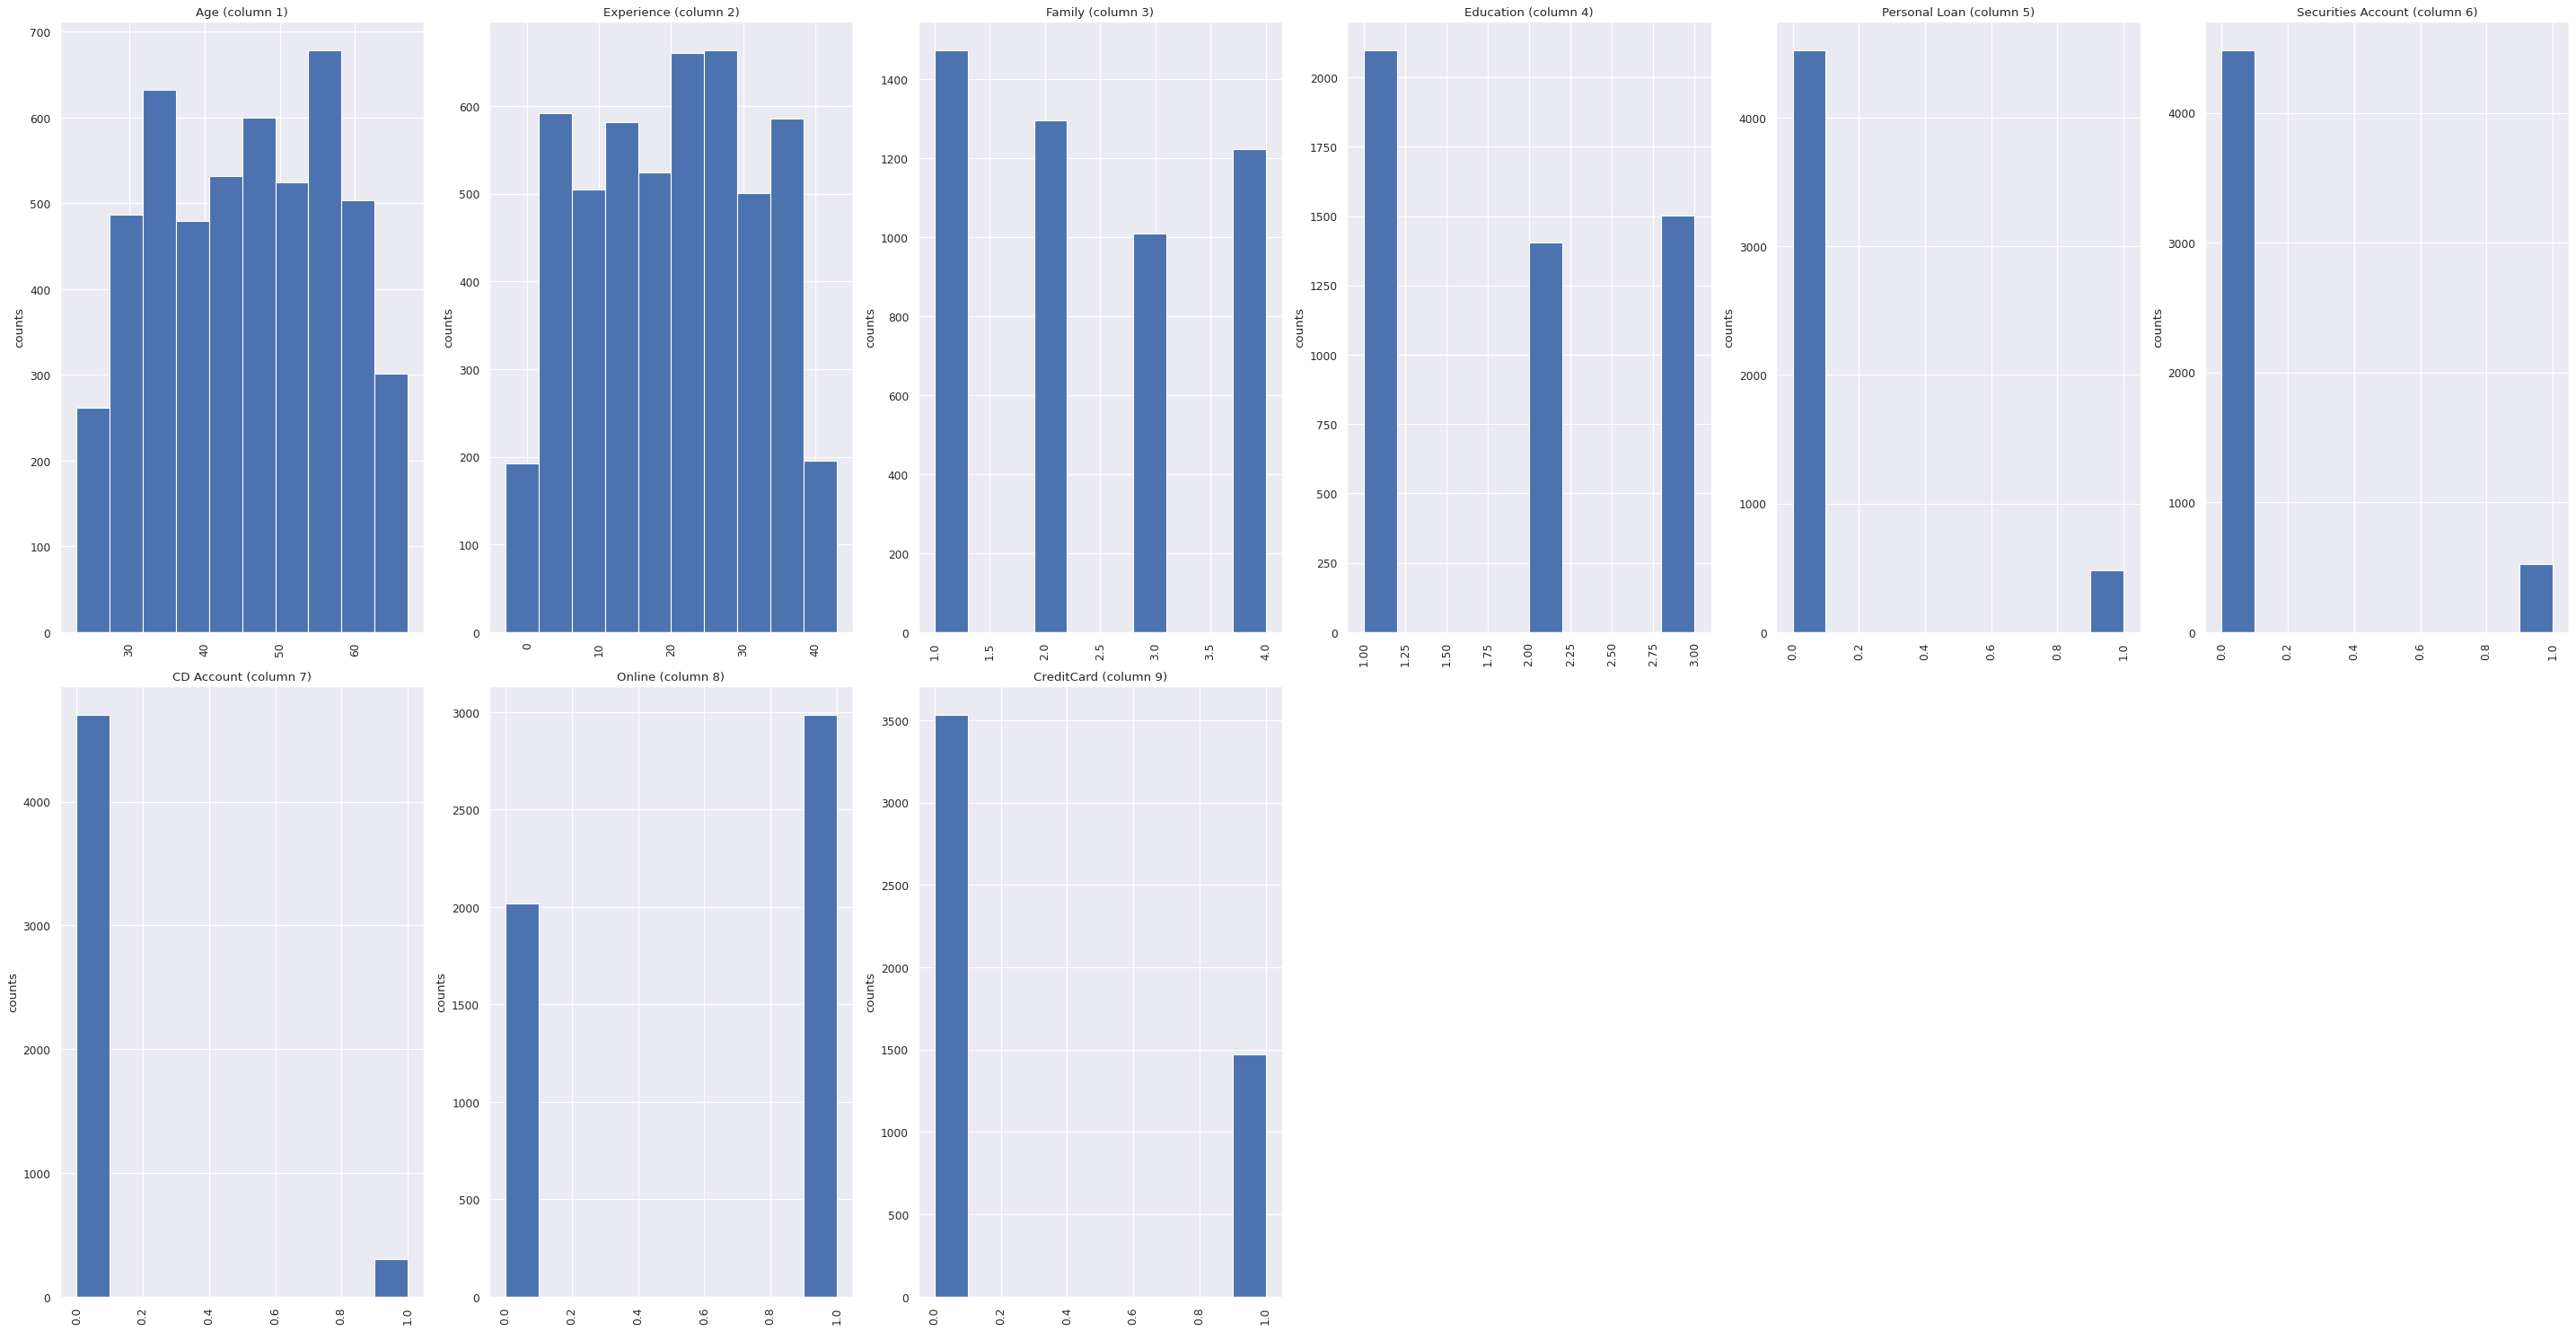

In [10]:
plotPerColumnDistribution(df, 10, 6)

In [11]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

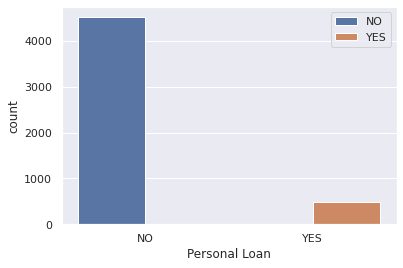

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.countplot(x="Personal Loan", data=df,hue="Personal Loan")

positions = (0,1)
labels = ("NO","YES")
plt.xticks(positions, labels)
plt.legend(labels)

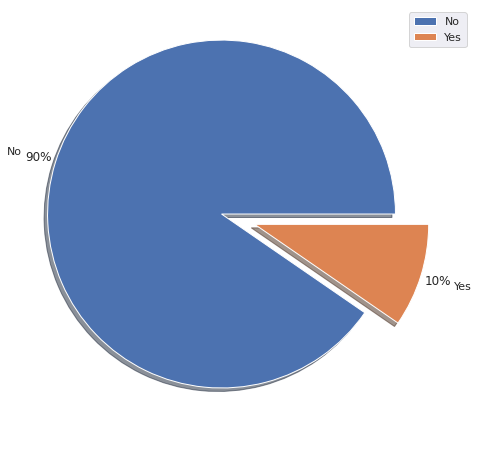

In [13]:
list_pie = list(df["Personal Loan"].value_counts())
temp_list = []

labels = ["No","Yes"]
for pie in list_pie:
  temp_list.append((pie/df.shape[0])*100)
myexplode = [0.2, 0]

sizes = temp_list

fig = plt.figure(figsize =(10, 8)) 
plt.pie(sizes, labels = labels,explode = myexplode, shadow = True,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend()
plt.show() 

In [14]:
df = df.drop(['ID','ZIP Code'],axis=1)

In [15]:
df.rename(columns={"Personal Loan": "Personal_Loan","Securities Account":"Sec_Acc","CD Account":"CD_Acc"},inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [16]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Sec_Acc', 'CD_Acc', 'Online',
       'CreditCard'],
      dtype='object')

# Testing algorithms with imbalancing data


In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

In [18]:
X = df[[i  for i in df.columns if i != 'Personal_Loan']]
Y = df['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## SVM linear

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
svm_linear = svm.SVC(kernel='linear').fit(X_train, y_train)

In [21]:
y_pred_svm_linear = svm_linear.predict(X_test)
y_pred_svm_linear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
from sklearn import metrics

def result(y_test,y_pred):
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))
  print("F1 score:",metrics.f1_score(y_test,y_pred))

result(y_test,y_pred_svm_linear)

Accuracy: 0.953
Precision: 0.9142857142857143
Recall: 0.6095238095238096
F1 score: 0.7314285714285714


In [23]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


def plotConfusionMatrix(type_model):
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

  for title, normalize in titles_options:
      disp = plot_confusion_matrix(type_model, X_test, y_test,
                                  display_labels=["No","Yes"],
                                  cmap=plt.cm.Blues,
                                  normalize=normalize)
      disp.ax_.set_title(title)

      print(title)
      print(disp.confusion_matrix)

  plt.show()

Confusion matrix, without normalization
[[889   6]
 [ 41  64]]
Normalized confusion matrix
[[0.99 0.01]
 [0.39 0.61]]


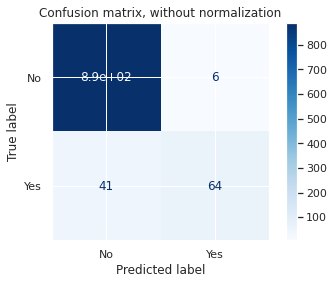

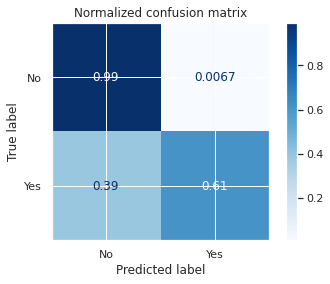

In [24]:
plotConfusionMatrix(svm_linear)

## SVM non linear

In [25]:
svm_poly = svm.SVC(kernel='poly', C=100, gamma='auto', degree=3,
               coef0=1).fit(X_train, y_train)

In [26]:
y_pred_svm_poly = svm_poly.predict(X_test)
y_pred_svm_poly

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
result(y_test,y_pred_svm_poly)

Accuracy: 0.984
Precision: 0.9320388349514563
Recall: 0.9142857142857143
F1 score: 0.9230769230769231


Confusion matrix, without normalization
[[888   7]
 [  9  96]]
Normalized confusion matrix
[[0.99 0.01]
 [0.09 0.91]]


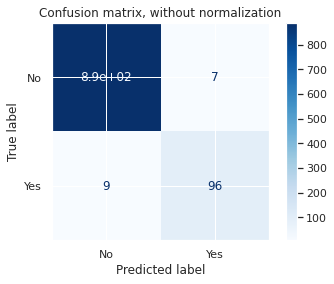

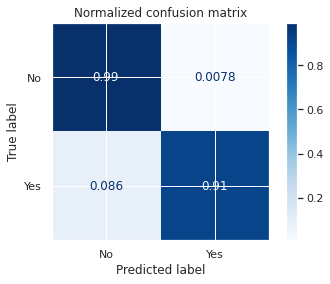

In [28]:
plotConfusionMatrix(svm_poly)

## Logisitc Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred_lg = lg.predict(X_test)
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
result(y_test,y_pred_lg)

Accuracy: 0.954
Precision: 0.8554216867469879
Recall: 0.6761904761904762
F1 score: 0.7553191489361701


Confusion matrix, without normalization
[[883  12]
 [ 34  71]]
Normalized confusion matrix
[[0.99 0.01]
 [0.32 0.68]]


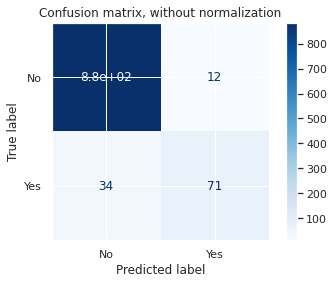

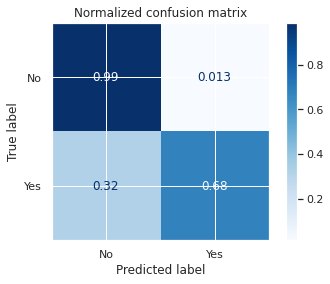

In [32]:
plotConfusionMatrix(lg)

## Navie Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
y_pred_nb = NB.predict(X_test)
y_pred_nb

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [35]:
result(y_test,y_pred_nb)

Accuracy: 0.894
Precision: 0.49612403100775193
Recall: 0.6095238095238096
F1 score: 0.547008547008547


Confusion matrix, without normalization
[[830  65]
 [ 41  64]]
Normalized confusion matrix
[[0.93 0.07]
 [0.39 0.61]]


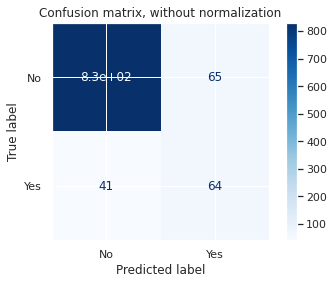

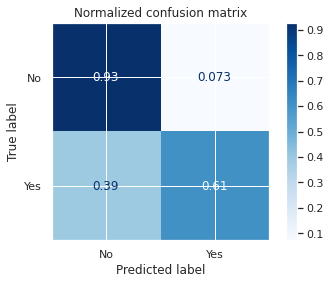

In [36]:
plotConfusionMatrix(NB)

## Decision Tree

In [37]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [38]:
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [39]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
result(y_test,y_pred_dtc)

Accuracy: 0.988
Precision: 0.9514563106796117
Recall: 0.9333333333333333
F1 score: 0.9423076923076923


# Summary result no.1

In [41]:
y_pred_list = [y_pred_svm_linear,y_pred_svm_poly,y_pred_lg,y_pred_nb,y_pred_dtc]

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [43]:
def cal_score(score):
  score = score.lower()
  f1_list = ['f1','f1 score','f1_score']
  plot_list = []
  for y_pred in y_pred_list:
    if score == 'accuracy':
        plot_list.append(round(accuracy_score(y_test,y_pred)*100,2))
    elif score == 'precision':
        plot_list.append(round(precision_score(y_test,y_pred)*100,2))
    elif score == 'recall':
        plot_list.append(round(recall_score(y_test,y_pred)*100,2))
    elif score in f1_list:
        plot_list.append(round(f1_score(y_test,y_pred)*100,2))
    else:
        raise TypeError("Score types are allowed is: Accucary, Precision, Recall, F1 Score")
  return plot_list

In [44]:
def PlotBarAccuracy(plot_list,name):
  sns.set()
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_axes([0,0,1,1])
  algo_name = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
  ax.bar(algo_name,plot_list,color=("red", "green", "blue", "black", "pink"))
  plt.title("{} Score".format(name))
  plt.xlabel("Algorithm name")
  plt.ylabel("Percent")
  plt.xticks(rotation=45)

  for i in range(len(plot_list)):
      plt.annotate(str(plot_list[i]), xy=(algo_name[i],plot_list[i]), ha='center', va='bottom')
  plt.show()

In [45]:
accuracy_list = cal_score('Accuracy')

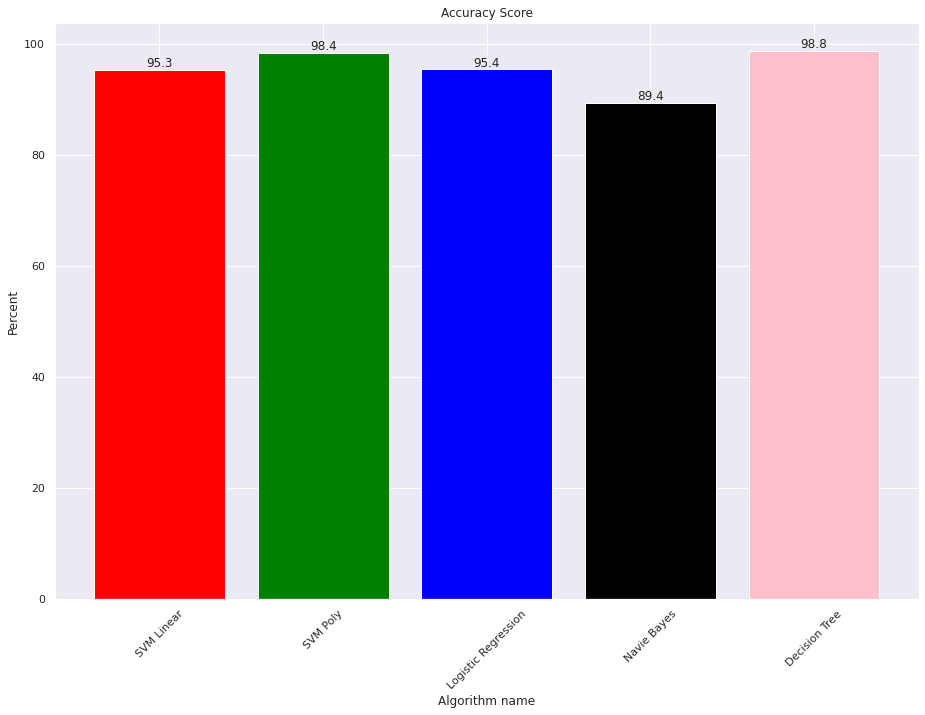

In [46]:
PlotBarAccuracy(accuracy_list,'Accuracy')

In [47]:
precision_list = cal_score('precision')

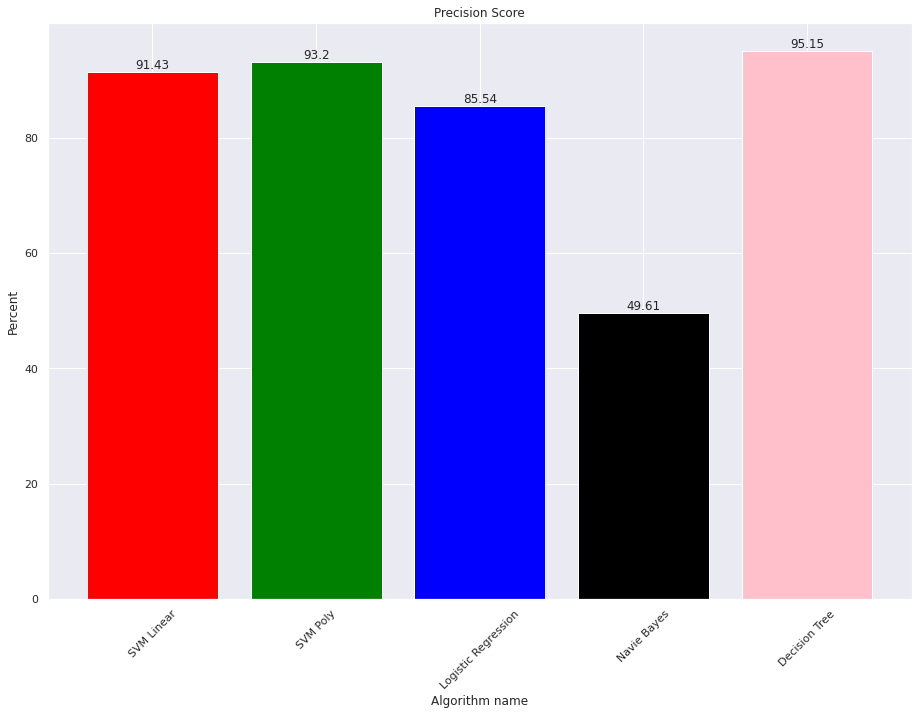

In [48]:
PlotBarAccuracy(precision_list,'Precision')

In [49]:
recall_list = cal_score('recall')

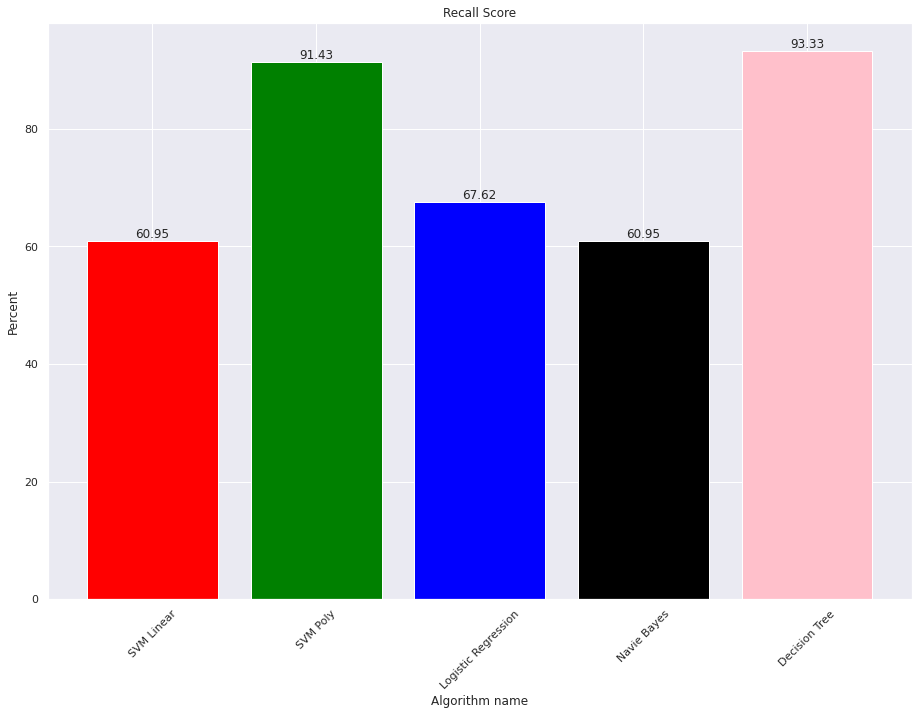

In [50]:
PlotBarAccuracy(recall_list,'Recall')

In [51]:
f1_list = cal_score('f1 score')

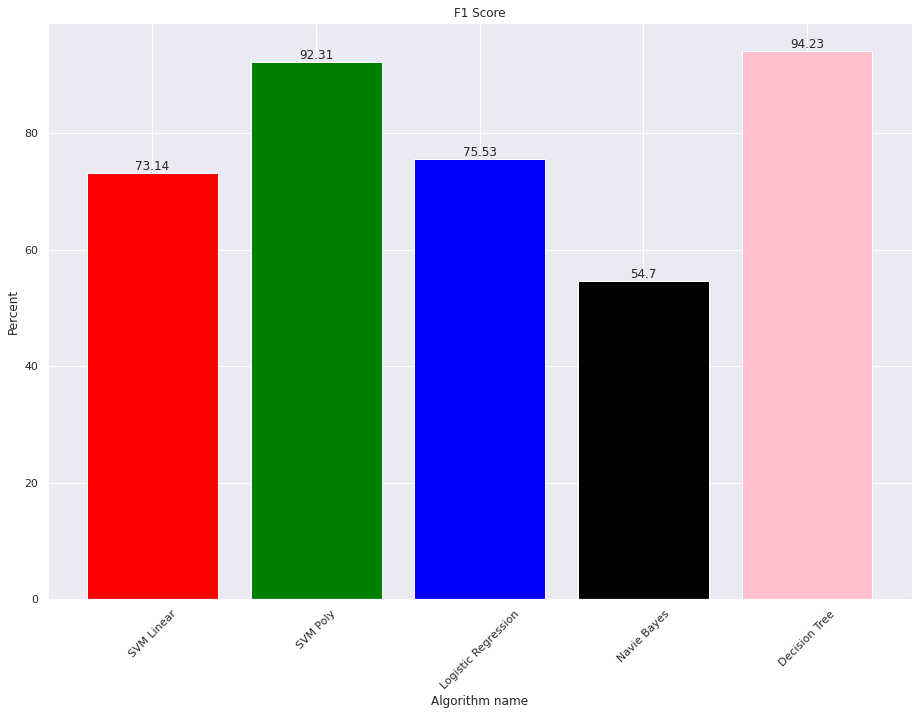

In [52]:
PlotBarAccuracy(f1_list,'F1')

In [53]:
tableData = np.array([accuracy_list,precision_list,recall_list,f1_list])
tableData.shape

(4, 5)

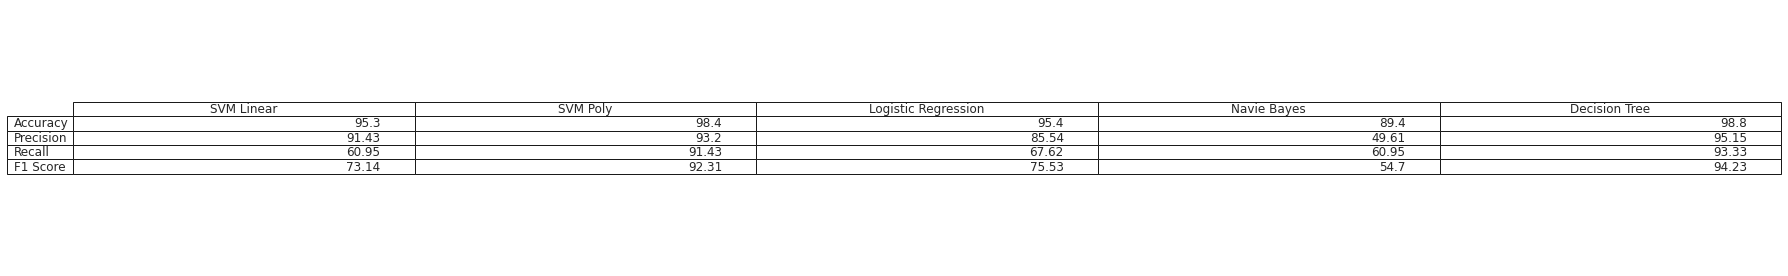

In [54]:
columns = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
rowLabels = ['Accuracy','Precision','Recall','F1 Score']

fig = plt.figure(figsize=(25,4))
# hide axes
fig.patch.set_visible(True)
plt.axis('off')
plt.axis('tight')
plt.table(cellText=tableData,
                      rowLabels=rowLabels,
                      colLabels=columns,loc='center')
fig.tight_layout()
plt.savefig('table.png')
plt.show()

# Balancing data

In [55]:
df.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [56]:
df_per_0 = df[df['Personal_Loan'] == 0]
df_per_0.shape

(4520, 12)

In [57]:
df_per_1 = df[df['Personal_Loan'] == 1]
df_per_1.shape

(480, 12)

In [58]:
df_concat_1 = pd.concat([df_per_0,df_per_1])
df_concat_1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13,129,3,4.1,3,0,1,0,1,1,1
4927,43,19,121,1,0.7,2,0,1,0,1,1,1
4941,28,4,112,2,1.6,2,0,1,0,0,1,0
4962,46,20,122,3,3.0,3,0,1,0,1,1,1


In [59]:
loc_increment = 0
df_list = []
for i in range(df_per_0.shape[0]//df_per_1.shape[0]):
  df_1 = df[df["Personal_Loan"] == 0].iloc[loc_increment:loc_increment + df_per_0.shape[0]//10]
  df_2 = df[df["Personal_Loan"] == 1]
  df_concat_2 = pd.concat([df_1,df_2])
  print("Data number {}:".format(i+1),df_concat_2.shape)
  df_list.append(df_concat_2)
  loc_increment = loc_increment + df_per_0.shape[0]//df_per_1.shape[0]

Data number 1: (932, 12)
Data number 2: (932, 12)
Data number 3: (932, 12)
Data number 4: (932, 12)
Data number 5: (932, 12)
Data number 6: (932, 12)
Data number 7: (932, 12)
Data number 8: (932, 12)
Data number 9: (932, 12)


## SVM Linear

In [60]:
svm_linear_data_list = []
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_1)

  X_train_1 = scaler.transform(X_train_1)
  X_test_1 = scaler.transform(X_test_1)
  svm_linear_1 = svm.SVC(kernel='linear').fit(X_train_1, y_train_1)
  y_pred_1 = svm_linear_1.predict(X_test_1)
  svm_linear_data_list.append(accuracy_score(y_test_1,y_pred_1))

In [61]:
import numpy as np

print(np.mean(svm_linear_data_list))

0.918597742127154


## SVM No Linear

In [62]:
svm_poly_data_list = []
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_2)

  X_train_2 = scaler.transform(X_train_2)
  X_test_2 = scaler.transform(X_test_2)
  svm_poly_2 = svm.SVC(kernel='poly', C=100, gamma='auto', degree=3,
               coef0=1).fit(X_train_2, y_train_2)
  y_pred_2 = svm_poly_2.predict(X_test_2)
  svm_poly_data_list.append(accuracy_score(y_test_2,y_pred_2))

In [63]:
print(np.mean(svm_poly_data_list))

0.948306595365419


## Logistic Regression

In [64]:
lg_data_list = []
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_3)
  scaler.fit(X_test_3)

  X_train_3 = scaler.transform(X_train_3)
  X_test_3 = scaler.transform(X_test_3)
  lg_2 = LogisticRegression().fit(X_train_3, y_train_3)
  y_pred_3 = lg_2.predict(X_test_3)
  lg_data_list.append(accuracy_score(y_test_3,y_pred_3))

In [65]:
print(np.mean(lg_data_list))

0.922756981580511


## Naive Bayes

In [66]:
nb_data_list = []

In [67]:
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_4)
  scaler.fit(X_test_4)

  X_train_4 = scaler.transform(X_train_4)
  X_test_4 = scaler.transform(X_test_4)
  NB_2 = GaussianNB().fit(X_train_4, y_train_4)
  y_pred_4 = lg_2.predict(X_test_4)
  nb_data_list.append(accuracy_score(y_test_4,y_pred_4))

In [68]:
print(np.mean(nb_data_list))

0.9215686274509804


## Decision Tree

In [69]:
dct_data_list = []

In [70]:
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_5)
  scaler.fit(X_test_5)

  X_train_5 = scaler.transform(X_train_5)
  X_test_5 = scaler.transform(X_test_5)
  DCT_2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train_5, y_train_5)
  y_pred_5 = DCT_2.predict(X_test_5)
  dct_data_list.append(accuracy_score(y_test_5,y_pred_5))

In [71]:
print(np.mean(dct_data_list))

0.964349376114082


## Visualize differences between 2 methods

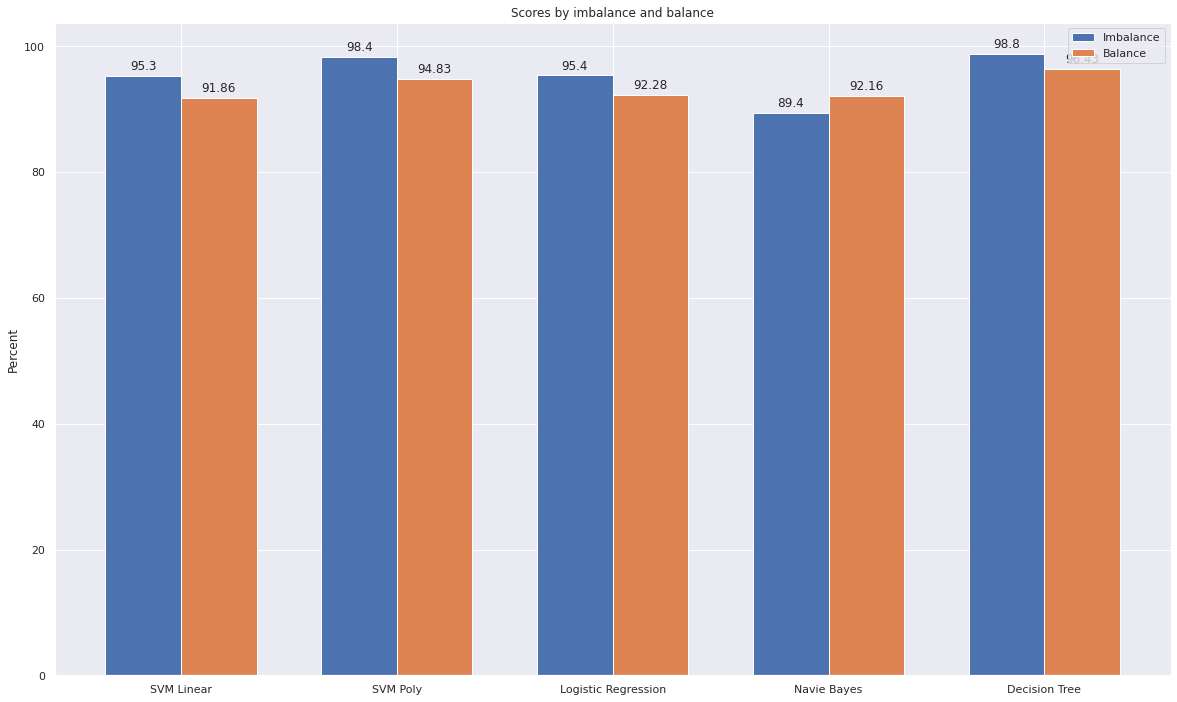

In [72]:
labels = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
accuracy_list_1 = cal_score('Accuracy')
accuracy_list_2 = [round(np.mean(svm_linear_data_list)*100,2),round(np.mean(svm_poly_data_list)*100,2),
                   round(np.mean(lg_data_list)*100,2),round(np.mean(nb_data_list)*100,2),round(np.mean(dct_data_list)*100,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(20,12))
rects1 = plt.bar(x - width/2, accuracy_list_1, width, label='Imbalance')
rects2 = plt.bar(x + width/2, accuracy_list_2, width, label='Balance')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Percent')
plt.title('Scores by imbalance and balance')
plt.xticks(x,labels)
plt.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.savefig('difference.png')
plt.show()

# Using PCA 

## 2D

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_temp = pca.fit_transform(X_train)

In [74]:
y_train_temp = y_train.to_numpy().reshape(y_train.shape[0],1)
y_train_temp.shape

(4000, 1)

In [75]:
data_set_temp = np.concatenate([X_train_temp,y_train_temp],axis=1)
data_set_Df = pd.DataFrame(data = data_set_temp
             , columns = ['principal component 1', 'principal component 2','y'])

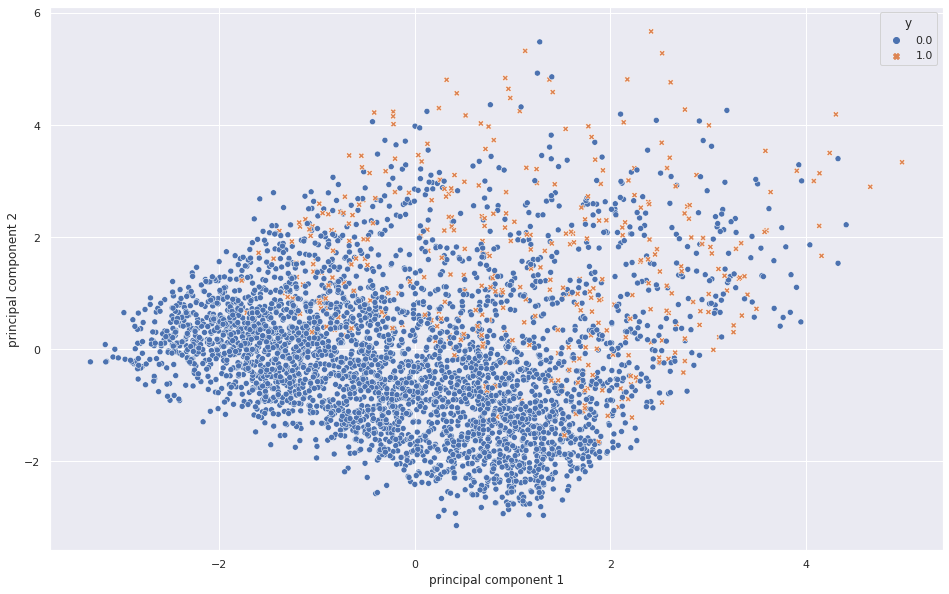

In [76]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=data_set_Df,
    style="y",
    legend="full"
)

plt.show()

## 3D

In [77]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=3)
X_train_temp_2 = pca_2.fit_transform(X_train)

In [78]:
y_train_temp_2 = y_train.to_numpy().reshape(y_train.shape[0],1)
y_train_temp_2.shape

(4000, 1)

In [79]:
data_set_temp_2 = np.concatenate([X_train_temp_2,y_train_temp_2],axis=1)
data_set_Df_2 = pd.DataFrame(data = data_set_temp_2
             , columns = ['principal component 1', 'principal component 2','principal component 3','y'])
data_set_Df_2.shape

(4000, 4)

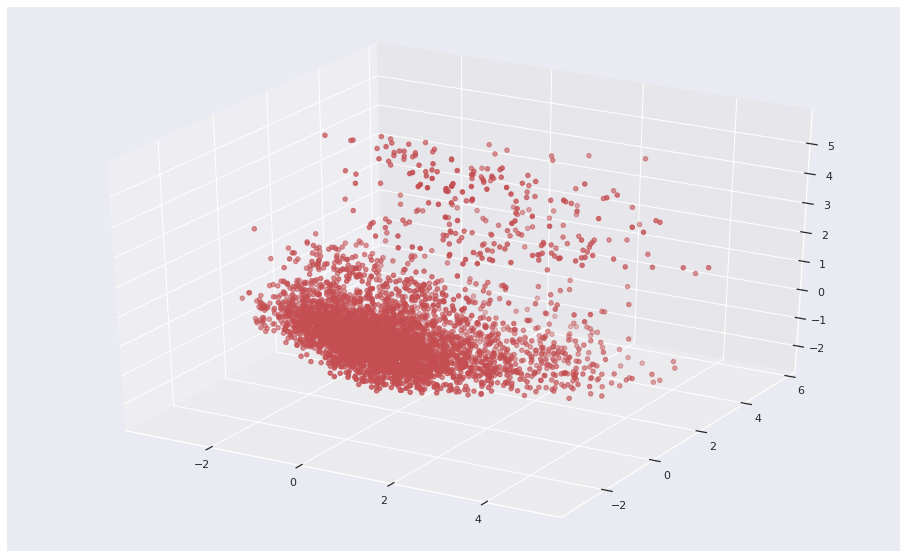

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs=data_set_Df_2["principal component 1"], ys=data_set_Df_2["principal component 2"],zs=data_set_Df_2["principal component 3"],color=[], marker='o',)

plt.show()